# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hamemayu Hayuningrat
- **Email:** hamemayuhayuningrat752@gmail.com
- **ID Dicoding:** me_hame

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor lingkungan seperti musim, cuaca, temperatur, kelembapan, dan kecepatan angin terhadap penyewaan sepeda?
- Bagaimana pengaruh hari libur terhadap banyaknya sepeda yang tersewa?
- Pada jam berapa terjadinya puncak penyewaan sepeda?
- Bagaimana distribusi tersewanya sepeda pada waktu-waktu sepanjang hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from operator import itemgetter

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dilihat dari kolom-kolom dataframe yang ada kedua dataframe sama, hanya saja untuk hour_df terdapat kolom `hr` yang merepresentasikan `jam` menurut dokumentasinya

- Dari dokumentasi yang ada, terdapat penjelasan mengenai kolom-kolom tersebut, antara lain:
    - instant: indeks record
    - dteday : hari
    - season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
    - yr : tahun (0: 2011, 1:2012)
    - mnth : bulan ( 1 to 12)
    - hr : jam (0 to 23)
    - holiday : menentukan apakah hari itu hari libut atau bukan
    - weekday : hari dalam sepekan
    - workingday : jika hari adalah bukan hari libur atau akhir pekan maka 1, sebaliknya 0.
    - weathersit :
        <ol>
            <li>
                : Cerah, Sedikit awan, Berawan sebagian
            </li>
            <li>
                : Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
            </li>
            <li>
                : Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
            </li>
            <li>
                : Hujan Lebat + Es Batu + Badai Petir + Kabut, Salju + Kabut
            </li>
        </ol>
    - temp : Suhu yang telah dinormalisasi dalam Celcius. Nilainya diturunkan melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala jam)
    - atemp: Normalisasi suhu yang dirasakan dalam Celsius. Diturunkan melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala jam)
    - hum: kelembapan yang dinormalisasikan. Nilai-nilainya dibagi 100
    - windspeed: kecepatan udara yang dinormalisasikan. Nilai-nilai dibagi 67 (maksimal)
    - casual: banyaknya pengguna pengguna kasual
    - registered: banyaknya pengguna yang telah terdaftar
    - cnt: banyaknya penyewa sepeda termasuk kedua-duanya kasual dan terdaftar

- Dapat diambil kesimpulan bahwa setiap dataset masing-masing menunjukkan banyaknya penyewa sepeda dalam rentang hari untuk day_df dan rentang jam untuk hour_df dengan memerhatikan faktor lingkungan seperti suhu, kecepatan angin, kelembapan dan musim

### Assessing Data

#### Menilai data hour_df

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- dari hasil `code` diatas terdapat masalah mengenai tipe data. Dimana terdapat tipe data yang tidak sesuai pada kolom-kolom berikut
    - `dteday` yang seharusnya datetime
    - `holiday` yang seharusnya tipe data boolean
    - `workingday` yang seharusnya juga boolean
- banyaknya data berbanding lurus dengan banyaknya baris, ini mengindikasikan tidak ada <i>missing values</i>

In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight**
- benar saja tidak ada <i>missing values</i> pada dataframe tersebut

In [6]:
hour_df.duplicated().sum()

0

**Insight**
- tidak ada baris yang terduplikasi dari dataframe hour_df

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- tidak ada keanehan dari dataframe hour_df ini

#### Menilai data day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight**
- terdapat kolom-kolom yang tidak sesuai dengan tipe data, seperti pada kolom berikut
    - kolom `dtaday` yang seharusnya bertipe data `timedate`
    - `holiday` dan `workingday` seharusnya memiliki tipe data `boolean`
- selajutnya banyak data sama dengan baris yang ada, ini menunjukkan bahwa tidak ada `missing values` pada dataframe tersebut

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight**
- benar saja, setelah di cek tidak ada `missing values`

In [10]:
day_df.duplicated().sum()

0

**Insight**
- dari `code` diatas menunjukkan bahwa tidak ada data yang duplikat

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- dari ringkasan dataframe day_df diatas, tidak ada record yang aneh

### Cleaning Data

dalam proses cleaning data ini hanya akan dilakukan penyesuaian tipe data pada kolom-kolom `dteday`, `holiday` dan `workingday`

In [12]:
convert_columns_datatype = {
    'dteday': 'datetime64[ns]',
    'holiday': bool,
    'workingday': bool,
}

#### Menyesuaikan tipe data pada dataframe hour_df

In [13]:
hour_df = hour_df.astype(convert_columns_datatype)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight**
- dari tipe data yang tidak sesuai telah berhasil disesuaikan sesuai tipenya masing-masing

#### Menyesuaikan tipe data pada dataframe day_df

In [14]:
day_df = day_df.astype(convert_columns_datatype)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), datetime64[ns]

**Insight:**
- berhasil menyesuaikan tipe data yang tidak sesuai untuk masing-masing kolom yang ditargetkan

## Exploratory Data Analysis (EDA)

In [15]:
seasons_mapping = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}

weather_mapping = {
    1: "Cerah/Berawan",
    2: "Kabut/Berawan",
    3: "Hujan Ringan/Salju Ringan",
    4: "Cuaca Ekstrem"
}

# categorized temperature
# temp < 10         dingin
# 10 <= temp <= 20  sejuk
# 20 < temp <= 30   hangat
# 30 < temp         panas
temperature_mapping = {
    'Dingin': 10,
    'Sejuk': 20,
    'Hangat': 30,
    'Panas': np.Infinity,
}

# categorized humidity
# hum < 30         : Sangat Kering
# 30 <= hum <= 50  : Kering
# 50 < hum <= 70   : Sedang
# 70 < hum <= 85   : Lembap
# 85 < hum         : Sangat Lembab
humidity_mapping = {
    'Sangat Kering': 30,
    'Kering': 50,
    'Sedang': 70,
    'Lembap': 85,
    'Sangat Lembab': np.Infinity
}

# categorized windspeed
# ws < 10           : Tenang
# 10 <= ws <= 30    : Sedang
# 30 < ws <= 50     : Bertepatan
# 50 < ws           : Kencang
windspeed_mapping = {
    'Tenang': 10,
    'Sedang': 30,
    'Bertepatan': 50,
    'Kencang': np.Infinity,
}

# categorized hour
# 0 <= hour < 5    : Dini hari
# 5 <= hour < 11   : Pagi
# 11 <= hour < 15  : Siang
# 15 <= hour < 18  : Sore
# 18 <= hour < 24  : Malam
hour_mapping = {
    'Dini Hari': [0, 5],
    'Pagi': [5, 11],
    'Siang': [11, 15],
    'Sore': [15, 18],
    'Malam': np.Infinity,
}

# based holiday column
day_type = {
    True: 'Holiday',
    False: 'Workday'
}

In [16]:
def categorize_with_loop(categories = list(), values = list(), target_value = 0):
    category = categories[0]

    index = 0
    for value in values:
        is_list = isinstance(value, list)

        if not is_list and target_value < value and index == 0:
            break

        category = categories[index]

        # when list we use range
        # otherwise use <= value
        is_done = (
            (not is_list and target_value <= value) or
            (is_list and value[0] <= target_value and target_value < value[1])
        )

        if is_done:
            break

        index += 1

    return category

# function on documentation
#  normalized_temp = (original_temp - t_min)/(t_max - t_min)
# 
# so origin temperature can getting by
#   origin_temp = (normalized_temp * (t_max - t_min)) + (t_min)
# where t_max = 39 and t_min =-8
def get_origin_temperature(normalized_temperature, tmax = 39, tmin = -8):
    return (normalized_temperature * (tmax - (tmin))) + tmin

# function on documentation
#   normalized_humidity = origin_humidity / 100
# 
# so origin humidity can getting by
#   origin humidity = normalized_humidity * 100
def get_origin_humidity(normalized_humidity, scala = 100):
    return normalized_humidity * 100

# function on documentation
#   normalized_windspeed = origin_windspeed / 67
# 
# so use derive function for getting origin_windspeed such as
#   origin_windspeed = normalized_windspeed * 67
def get_origin_windspeed(normalized_windspeed, scala = 67):
    return normalized_windspeed * 67

# categorize temperature based on documentation
# where temp normalized with function
#   temp_normalized = (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39, t = original temperature
def categorize_temp(t, tmax = 39, tmin = -8):
    original_temp = get_origin_temperature(t, tmax=tmax, tmin=tmin)

    temp_keys_map = list(temperature_mapping.keys())
    temp_vals_map = list(temperature_mapping.values())

    return categorize_with_loop(temp_keys_map, temp_vals_map, original_temp)

# categorize humidity based on documentation
# where humidity nomalized gained with function
#   humidity_normalized = humidity_origin / 100
def categorize_humid(humid, scala = 100):
    original_humid = get_origin_humidity(humid, scala=scala)

    humid_keys = list(humidity_mapping.keys())
    humid_values = list(humidity_mapping.values())

    return categorize_with_loop(humid_keys, humid_values, original_humid)

# categorize windspeed based on documentation
# where the windspeed normalized gained using function
#   windspeed normalized = windspeed original / 67
def categorize_windspeed(windspeed, scala = 67):
    original_windspeed = get_origin_windspeed(windspeed, scala=scala)

    windspeed_keys = list(windspeed_mapping.keys())
    windspeed_values = list(windspeed_mapping.values())

    return categorize_with_loop(windspeed_keys, windspeed_values, original_windspeed)

# categorize hour based time
def categorize_hour(hour):
    hour_keys = list(hour_mapping.keys())
    hour_values = list(hour_mapping.values())

    return categorize_with_loop(hour_keys, hour_values, hour)

def grouping_sum_user(dataframe, by, sort_values = True, ascending = False):
    result_df = dataframe.groupby(by).agg({
        'cnt': 'sum',
        'casual': 'sum',
        'registered': 'sum',
    })

    if (not sort_values):
        return result_df

    return result_df.sort_values(by='cnt', ascending=ascending)

def grouping_sum_user_v2(dataframe, by, show_columns = '*', sort_values = False, ascending = False):
    result_df = dataframe.groupby(by).agg(
        row_count = ('cnt', 'count'),
        rent_count = ('cnt', 'sum'),
        rent_mean = ('cnt', 'mean'),
        casual_count = ('casual', 'sum'),
        registered_count = ('registered', 'sum')
    ).reset_index().sort_values(by = 'rent_count', ascending=ascending)

    if (show_columns == '*' or not isinstance(show_columns, list)):
        return result_df
    
    return result_df[show_columns]


### Explore data hour_df

#### faktor musim yang berpengaruh terhadap banyaknya penyewaan sepeda

sebelum mencarinya, untuk memudahkan membaca musim, maka diperlukan kolom tambahan yakni `season_category` dimana akan membuat kelompok untuk kategori musim berdasarkan dokumentasi yang telah ada

In [17]:
hour_df['season_category'] = hour_df['season'].map(seasons_mapping)

grouping_sum_user(hour_df, 'season_category')

,cnt,casual,registered
season_category,,,
Musim Gugur,1061129,226091,835038
Musim Panas,918589,203522,715067
Musim Dingin,841613,129782,711831
Musim Semi,471348,60622,410726


**Insight**
- terlihat bahwa penyewa sepeda paling banyak ada pada musim gugur, akan tetapi tidak jauh beda dengan musim panas maupun musim dingin
- terlihat jauh berbeda dengan musim dingin, dimana penyewa sepeda sangat turun drastis

#### faktor cuaca yang berpengaruh terhadap banyaknya penyewaan sepeda

kolom `weathersit` dapat dikategorikan dengan mengikuti dokumentasi yang telah ada, dibawah ini dibuat mapping untuk kolom baru `weather_category` untuk memudahkan pembacaan nama cuaca. kemudian dihitung dengan jumlah penyewa sepeda

In [18]:
hour_df['weather_category'] = hour_df['weathersit'].map(weather_mapping)

grouping_sum_user(hour_df, 'weather_category')

,cnt,casual,registered
weather_category,,,
Cerah/Berawan,2338173,462745,1875428
Kabut/Berawan,795952,134481,661471
Hujan Ringan/Salju Ringan,158331,22783,135548
Cuaca Ekstrem,223,8,215


**Insight**
- menurut faktor cuaca, penyewa sepeda paling banyak terjadi apabila cuaca cerah atau berawan
- paling sedikit ada ada cuaca ekstrem

#### faktor temperatur yang berpengaruh terhadap banyaknya penyewaan sepeda

pada kolom `temp` dapat dikategorikan berdasarkan kategori temperatur, sedemikian sehingga diperoleh kolom `temp_category` berikut, kemudian akan dicari banyaknya penyewa sepeda pada setiap kategori

untuk mengategorikan suhu, maka dibuat `mapping` seperti berikut:

- dingin  : `suhu` < 10        <br>
- sejuk   : 10 <= `suhu` <= 20 <br>
- hangat  : 20 < `suhu` <= 30  <br>
- panas   : 30 < `suhu`        <br>

In [19]:
hour_df['temp_category'] = hour_df['temp'].apply(categorize_temp)

grouping_sum_user(hour_df, 'temp_category')

,cnt,casual,registered
temp_category,,,
Hangat,1486229,329079,1157150
Sejuk,949036,170304,778732
Dingin,626084,61749,564335
Panas,231330,58885,172445


**Insight**
- terlihat bahwa penyewa sepeda sangat banyak pada suhu hangat, dimana suhu ini berkisar antara 20 hingga 30 derajat celcius
- sementara penyewa sepeda sangat sedikit antusiasme apabila suhu sangat panas yakni apabila suhu berkisar lebih dari 30 derajat celcius

#### faktor kelembapan udara dalam pengaruh penyewaan sepeda

karena nilai dari kolom kelembapan udara merupakan integer, sebelumnya akan diubah menjadi data kategori dengan membuat <i>mapping</i> seperti berikut
    <ul>
        <li>
            sangat kering :   `kelembapan` < 30
        </li>
        <li>
            kering:           30 <= `kelembapan`  <= 50
        </li>
        <li>
            Sedang :          50 < `kelembapan` <= 70
        </li>
        <li>
            Lembap :          70 < `kelembapan` <= 85
        </li>
        <li>
            Sangat Lembab :   85 < `kelembapan`
        </li>
    </ul>
dimana kelembapan merupakan kelembapan yang telah dicari nilai aslinya dengan rumus yang telah ada di dokumentasi

selanjutnya dicari hubungan antara banyaknya kelembapan dengan kategori yang telah dibuat dengan menyimpannya pada kolom `humid_category`

In [20]:
hour_df['humid_category'] = hour_df['hum'].apply(categorize_humid)

grouping_sum_user(hour_df, 'humid_category')

,cnt,casual,registered
humid_category,,,
Sedang,1139842,211937,927905
Kering,1111417,242968,868449
Lembap,570579,86859,483720
Sangat Lembab,247450,27364,220086
Sangat Kering,223391,50889,172502


**Insight**
- pada hasil diatas, nampak bahwa dua teratas dari kategori kelembapan sangat berbeda sedikit dimana ini merepresentasikan bahwa penyewa sepeda lebih memilih menyewa pada saat kelembapan diantara skala 30 hingga 70
- disisi lain pada dua terbawah juga nampak penyewa sepeda sangat sedikit, dimana pada kelembapan udara kurang dari skala 30 dan lebih dari 85

#### faktor kecepatan angin terhadap penyewaan sepeda

sebelum menggunakannya, maka akan dikelompokkan berdasarkan kategori kecepatan angin, dimana kecepatan angin telah dihitung ulang untuk mendapatkan kecepatan angin yang asli. untuk membuat kategorinya maka dibuat seperti berikut dan di simpan kedalam kolom `windspeed_category`
- Tenang         : `kecepatan angin` < 10 <br>
- Sedang         : 10 <= `kecepatan angin` <= 30 <br>
- Bertepatan     : 30 < `kecepatan angin` <= 50 <br>
- Kencang        : 50 < `kecepatan angin` <br>

In [21]:
hour_df['windspeed_category'] = hour_df['windspeed'].apply(categorize_windspeed)

grouping_sum_user(hour_df, 'windspeed_category')

,cnt,casual,registered
windspeed_category,,,
Sedang,2026173,395657,1630516
Tenang,1139251,201348,937903
Bertepatan,126128,22657,103471
Kencang,1127,355,772


**Insight:**
- Dapat diperhatikan bahwa penyewa sepeda lebih banyak pada saat keceatan angin sedang yakni pada kecepatan angin dalam rentang 10 hingga 30 skala knot
- selain itu, penyewa sepeda kurang drastis apabila keadaan kecepatan angin kencang yakni lebih dari 50 knot

#### Mencari puncak terjadinya penyewaan sepeda

Untuk melakukan ini, diperlukan untuk mencari banyaknya penyewa terhadap jam-jam tanpa perlu mengategorikannya

In [22]:
grouping_sum_user(hour_df, 'hr').head()

,cnt,casual,registered
hr,,,
17,336860,54220,282640
18,309772,44496,265276
8,261001,15761,245240
16,227748,53834,173914
19,226789,35505,191284


In [23]:
grouping_sum_user(hour_df, 'hr', ascending=True).head()

,cnt,casual,registered
hr,,,
4,4428,874,3554
3,8174,1893,6281
5,14261,1012,13249
2,16352,3412,12940
1,24164,4709,19455


**Insight**
- Seperti yang terlihat pada kedua hasil diatas, penyewa sepeda lebih banyak terjadi pada saat jam 17
- sementara penyewa sepeda akan sedikit sekali pada jam 4 pagi

#### Distribusi penyewa pada tiap-tiap waktu dalam sehari

untuk memperoleh hasil ini, diperlukan untuk membuat kategori waktu dalam sehari, seperti berikut ini

- Dini Hari : 0 <= `jam` < 5
- Pagi      : 5 <= `jam` < 11
- Siang     : 11 <= `jam` < 15
- Sore      : 15 <= `jam` < 18
- Malam     : 18 <= `jam` < 24

kemudian akan disimpan dalam kolom `hour_category` dan akan dicari banyaknya penyewa sepeda

In [24]:
hour_df['hour_category'] = hour_df['hr'].sort_values().apply(categorize_hour)

grouping_sum_user(hour_df, 'hour_category')

,cnt,casual,registered
hour_category,,,
Malam,986109,154214,831895
Pagi,770260,84074,686186
Sore,747757,162660,585097
Siang,696305,200806,495499
Dini Hari,92248,18263,73985


**Insight:**
- dari hasil diatas menunjukkan bahwa penyewa sepeda paling banyak terjadi pada malam hari dimana pada rentang jam antara 18 hingga 24
- paling sedikit terjadi pada dinihari, yakni pada jam 00 hingga 05

### Explore data day_df

#### faktor musim terhadap persewaan sepeda

ini akan dilakukan seperti pada dataframe hour_df dimana membuat kolom `season_category` untuk menampungnya, kemudian mencari jumlahnya

In [25]:
day_df['season_category'] = day_df['season'].map(seasons_mapping)

grouping_sum_user(day_df, 'season_category')

,cnt,casual,registered
season_category,,,
Musim Gugur,1061129,226091,835038
Musim Panas,918589,203522,715067
Musim Dingin,841613,129782,711831
Musim Semi,471348,60622,410726


**Insight**
- kurang lebih sama seperti hour_df, karena musim dapat berubah tidak dalam hitungan jam

#### Faktor hari libur antusiasme penyewa sepeda

untuk melihat ini tidak perlu membuat kategori lagi karena telah jelas terdapat pada kolom `holiday`, akan tetepi diperlukan mencari rata-rata karena banyaknya hari libur dengan hari kerja tidaklah sama

In [26]:
day_df['day_type'] = day_df['holiday'].map(day_type)

grouping_sum_user_v2(day_df, 'day_type', ['day_type', 'rent_count', 'rent_mean'])

,day_type,rent_count,rent_mean
1,Workday,3214244,4527.104225
0,Holiday,78435,3735.000000


**Insight**
- terlihat bahwa antusiasme penyewa sepeda tidaklah naik pada hari libur, dimana dapat dilihat pada kolom `rent_mean` masih relatif jauh apabila bukan hari libur

## Visualization & Explanatory Analysis

In [27]:
# configs = [
#         {
#             'dataframe': 'test',
#             'by': 'by',
#             'is_ordinal': False,
#             'y_axis': 'test',
#             'x_axis': 'test',
#             'plot_type': 'barplot',
#         }
#     ]
def visualize_multiple_subplots(
    nrows,
    ncols,
    subplots,
    separate = False,
    suptitle = '',
):
    DEFAULT_SUBPLOT = {
        'y_axis': 'cnt',
        'plot_type': 'barplot',
        'is_ordinal': False,
        'horizontal': False,
        'grouping_func': grouping_sum_user,
        'template': '{0} {1}',
        'force_yaxis_to_category': False,
        'only_head': False,
        'invert_xaxis': False,
        'right_yaxis': False,
        'ascending': False,
        'mapping': None,
        'reindex': None,
    }

    width_size = ncols * 8
    height_size = nrows * 7

    if not separate:
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width_size, height_size))

    current_index = 0
    for row_index in range(nrows):
        for col_index in range(ncols):
            subplot = subplots[current_index]
            if separate:
                fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

            target_axe = axes

            if (not separate and nrows == 1 and ncols > 1):
                target_axe = axes[col_index]

            elif (not separate and nrows > 1 and ncols > 1):
                target_axe = axes[row_index, col_index]

            # remove axis
            if subplot == None:
                target_axe.set_visible(False)
                continue

            subplot = {**DEFAULT_SUBPLOT, **subplot}

            (
                dataframe, by, is_ordinal, y_axis, x_axis,
                plot_type, title, horizontal, grouping_func,
                template, only_head, invert_xaxis, right_yaxis,
                ascending, reindex
            ) = itemgetter(
                'dataframe', 'by', 'is_ordinal',
                'y_axis', 'x_axis', 'plot_type',
                'title', 'horizontal', 'grouping_func',
                'template', 'only_head', 'invert_xaxis',
                'right_yaxis', 'ascending', 'reindex'
            )(subplot)

            target_df = grouping_func(dataframe, by, sort_values=is_ordinal, ascending=ascending)

            if (only_head):
                target_df = target_df.head()

            if isinstance(reindex, list) and len(reindex):
                target_df = target_df.reindex(reindex)

            target_df = target_df.reset_index()

            value_axis = x_axis if horizontal else y_axis
            category_axis = y_axis if horizontal else x_axis

            max_index = target_df[value_axis].idxmax()
            max_value = target_df[y_axis][max_index]

            min_index = target_df[value_axis].idxmin()
            min_value = target_df[y_axis][min_index]

            target_value = min_value if ascending else max_value

            colors = ['#d3d3d3' if target_df[y_axis][i] != target_value else '#ff6347' for i in target_df.index]

            if (plot_type == 'barplot'):
                sns.barplot(
                    y=y_axis,
                    x=x_axis,
                    ax=target_axe,
                    data=target_df,
                    palette=colors,
                    # hue=y_axis if horizontal else x_axis,
                    orient='y' if horizontal else 'x',
                    order=target_df[category_axis]
                )

            elif plot_type == 'lineplot':
                sns.lineplot(
                    data=target_df,
                    ax=target_axe,
                    y=y_axis,
                    x=x_axis,
                    marker='o',
                    linestyle='-',
                    markersize=6,
                    linewidth=2,
                    color="#72BCD4"
                )

                plt.xticks(target_df[category_axis])

                # target_axe.grid(True, axis='x', linestyle='--', alpha=0.6)

                plt.text(
                    max_index,
                    max_value,
                    template.format(max_index, max_value),
                    fontsize=10,
                    ha='left',
                    va='top',
                    color='#ff6347'
                )

                plt.scatter(max_index, max_value, color='#ff6347', s=30, zorder=5, label="Max value")

            if horizontal:
                target_axe.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))            
            else:
                target_axe.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

            target_axe.set(xlabel=None, ylabel=None, title=title)

            if invert_xaxis:
                target_axe.invert_xaxis()

            if right_yaxis:
                target_axe.yaxis.set_label_position('right')
                target_axe.yaxis.tick_right()

            if separate:
                plt.show()

            current_index += 1

    if suptitle:
        plt.suptitle(suptitle)

    if not separate:
        plt.show()

def visualize_multiple_plots(nrows, plots, suptitle = ''):
    return visualize_multiple_subplots(nrows=nrows, ncols=len(plots), subplots=plots, separate=True, suptitle=suptitle)

    

### Pertanyaan 1:
Bagaimana faktor lingkungan seperti musim, cuaca, temperatur, kelembapan, dan kecepatan angin terhadap penyewaan sepeda?

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


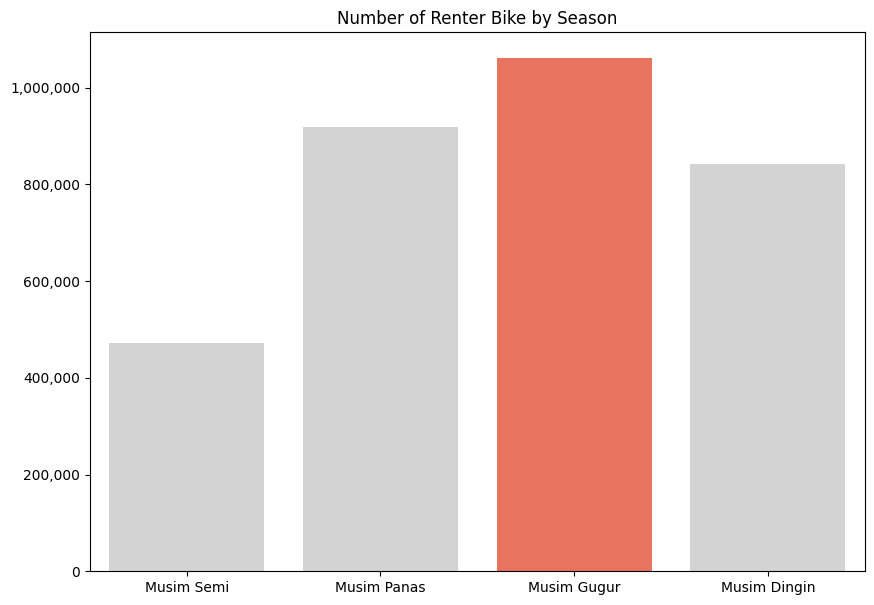

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


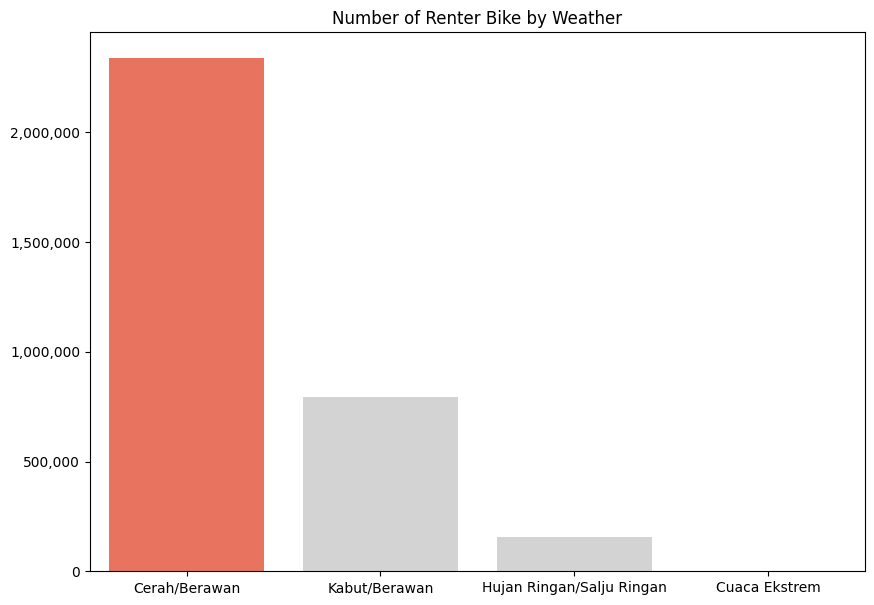

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


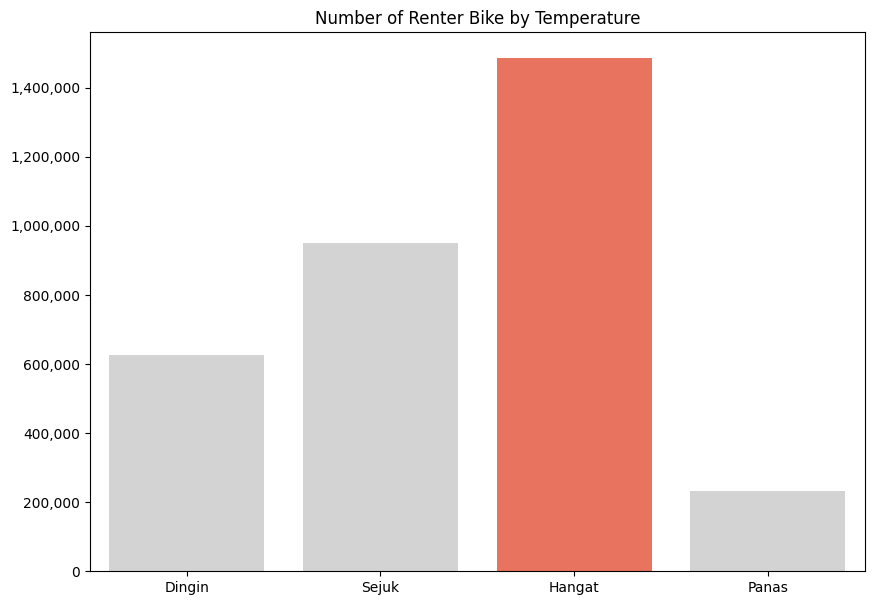

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


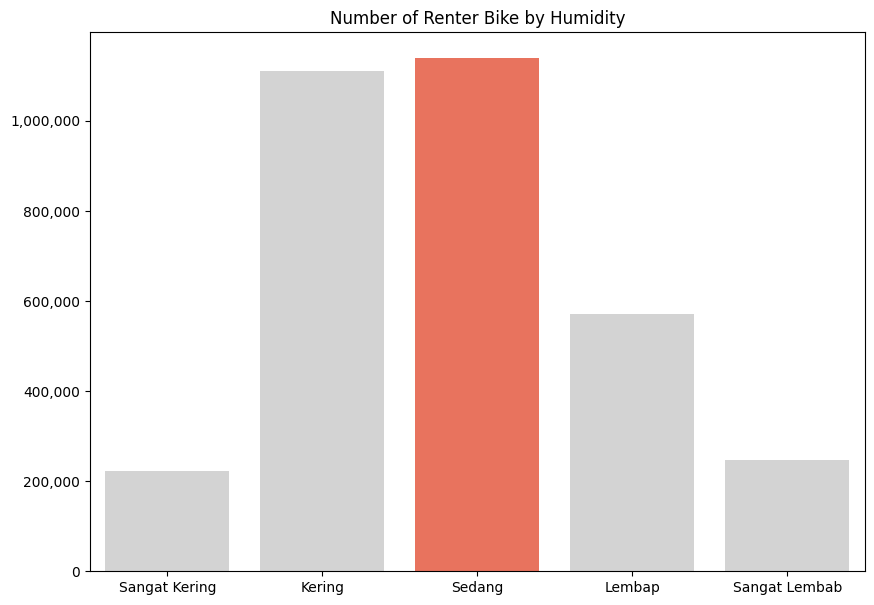

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


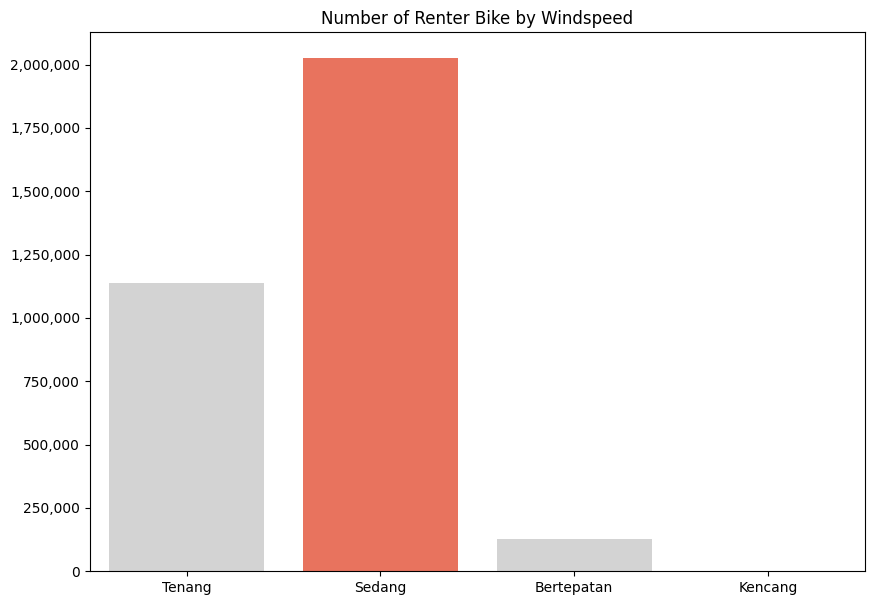

In [28]:
visualize_multiple_plots(
    nrows=1,
    plots=[
        {
            'dataframe': day_df,
            'by': 'season_category',
            'x_axis': 'season_category',
            'title': 'Number of Renter Bike by Season',
            'reindex': list(seasons_mapping.values())
        },
        {
            'dataframe': hour_df,
            'by': 'weather_category',
            'x_axis': 'weather_category',
            'title': 'Number of Renter Bike by Weather',
            'reindex': list(weather_mapping.values()),
        },
        {
            'dataframe': hour_df,
            'by': 'temp_category',
            'x_axis': 'temp_category',
            'title': 'Number of Renter Bike by Temperature',
            'reindex': list(temperature_mapping.keys()),
        },
        {
            'dataframe': hour_df,
            'by': 'humid_category',
            'x_axis': 'humid_category',
            'title': 'Number of Renter Bike by Humidity',
            'reindex': list(humidity_mapping.keys()),
        },
        {
            'dataframe': hour_df,
            'by': 'windspeed_category',
            'x_axis': 'windspeed_category',
            'title': 'Number of Renter Bike by Windspeed',
            'reindex': list(windspeed_mapping.keys()),
        },
    ],
)

**Insight**

Pengaruh musim terhadap banyaknya peminjam sepeda dapat terlihat pada plot yang pertama, dimana dapat disimpulkan bahwa banyaknya peminjam sepeda terjadi pada musim gugur, diikuti musim panas kemudian musim dingin yang yang paling terakhir adalah musim semi

Sementara untuk faktor cuaca sangatlah menentukan untuk mendapatkan peminjam sepeda, hal ini dapat dilihat pada banyaknya peminjam saat cuaca cerah/berawan sangat jauh berbeda dengan cuaca yang lainnya yang mana jarak peminjamnya tidak lebih dari setengahnya, berurutan banyak peminjam saat cuaca cerah/berawan menempati posisi pertama, kemudian cuaca kabut/berawan, selanjutnya cuaca hujan ringan/salju ringan dan terakhir adalah cuaca ekstrem

Dalam faktor suhu atau temperatur, penyewa sepeda menurut plot ketiga lebih banyak pada saat suhunya hangat (lihat tabel dibawah), kemudian saat suhunya sejuk, urutan ketiga saat suhu dingin dan yang terakhir adalah suhu panas. Berikut rentang suhu dengan kategorinya

|   Suhu                        | Kategori |
|-------------------------------|----------|
| $suhu < 10°C$                 |  Dingin  |
| $10°C \leq suhu \leq 20$°C    |  Sejuk   |
| $20°C < suhu  \leq 20°C$      |  Hangat  |
| $30°C < suhu$                 |  Panas   |

Faktor lingkungan yang dicari pengaruhnya adalah kelembapan udara, dimana penyewa sepeda paling banyak pada kelembapan udara sedang yang mana sedikit lebih banyak daripada saat kelembapan udara kering, kemudian berturut turut diikuti lembap, sangat lembap dan kering

Terakhir faktor lingkungan yang berperngaruh terhadap banyaknya penyewa sepeda adalah kecepatan angin dalam skala knot, dimana paling banyak adalah kecepatan angin sedang (10 - 30 knot), kemudian kecepatan angin tenang (0 - 9 knot), diikuti kecepatan angin bertepatan (31 - 50 knot), dan paling sedikit ada pada kecepatan angin kencang (> 50 knot)

### Pertanyaan 2:

Bagaimana pengaruh hari libur terhadap banyaknya sepeda yang tersewa?

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


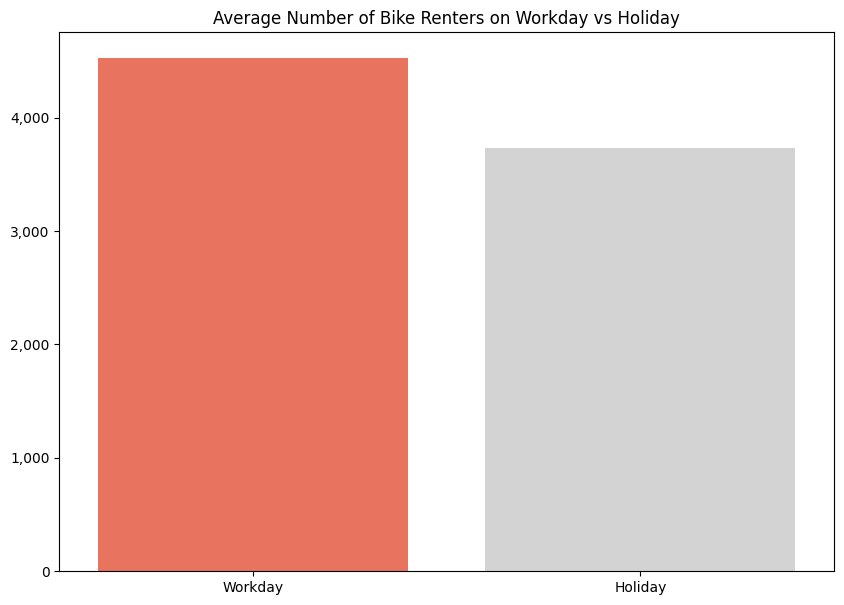

In [29]:
visualize_multiple_plots(
    nrows=1,
    plots=[
        {
            'dataframe': day_df,
            'by': 'day_type',
            'x_axis': 'day_type',
            'y_axis': 'rent_mean',
            'title': 'Average Number of Bike Renters on Workday vs Holiday',
            'grouping_func': grouping_sum_user_v2,
        },
    ],
)

**Insight**

Terlihat bahwa rata-rata peminjam sepeda pada hitungan hari tidaklah terpengaruh apabila hari itu adalah hari libur

### Pertanyaan 3:

Pada jam berapa terjadinya puncak penyewaan sepeda?

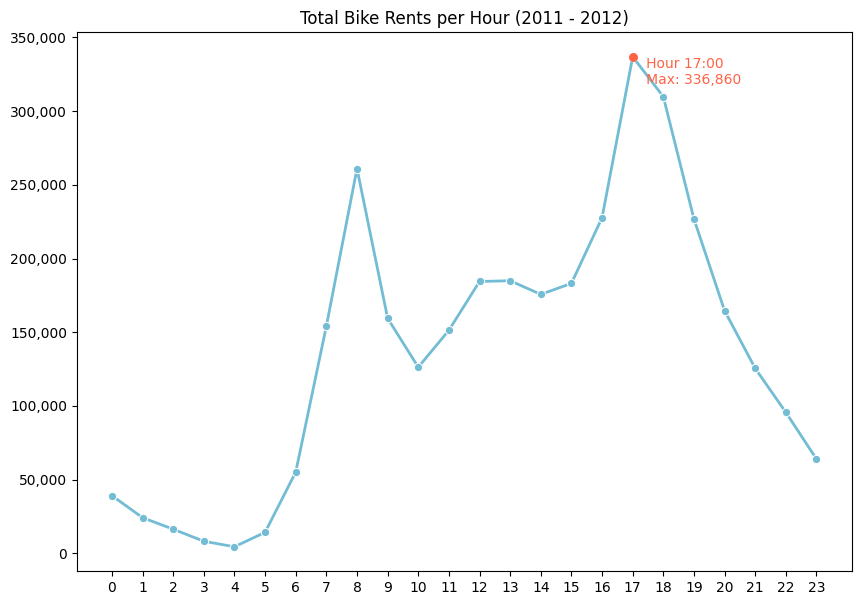

In [30]:
visualize_multiple_plots(
    nrows=1,
    plots=[
        {
            'dataframe': hour_df,
            'by': 'hr',
            'x_axis': 'hr',
            'title': 'Total Bike Rents per Hour (2011 - 2012)',
            'plot_type': 'lineplot',
            'template': '   Hour {0}:00\n   Max: {1:,}'
        },
    ],
)

**Insight**

Puncak terjadinya penyewaan sepeda paling banyak terdapat pada pukul 17.00 sore hari dimana banyaknya sepeda yang tersewa adalah 336.000

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


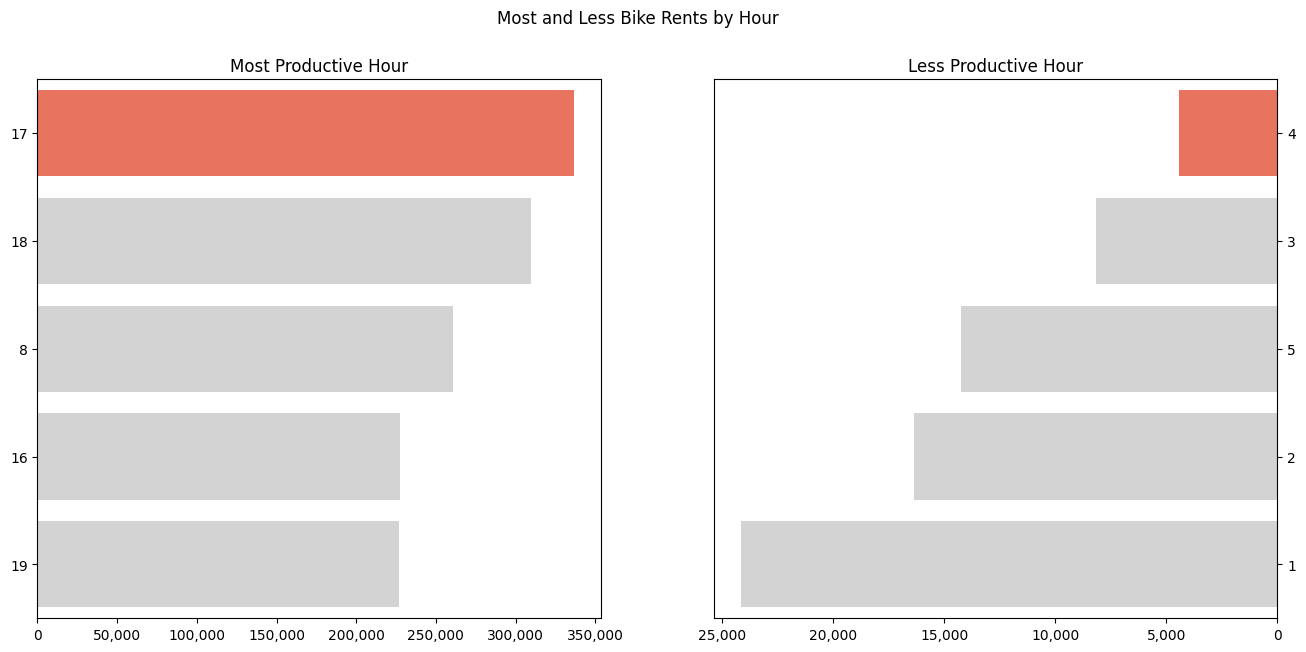

In [31]:
visualize_multiple_subplots(
    nrows=1,
    ncols=2,
    subplots=[
        {
            'dataframe': hour_df,
            'by': 'hr',
            'x_axis': 'cnt',
            'y_axis': 'hr',
            'title': 'Most Productive Hour',
            'horizontal': True,
            'is_ordinal': True,
            'only_head': True,
        },
        {
            'dataframe': hour_df,
            'by': 'hr',
            'x_axis': 'cnt',
            'y_axis': 'hr',
            'title': 'Less Productive Hour',
            'horizontal': True,
            'is_ordinal': True,
            'only_head': True,
            'invert_xaxis': True,
            'right_yaxis': True,
            'ascending': True,
        },
    ],
    suptitle='Most and Less Bike Rents by Hour'
)

**Insight**

Seperti pada plot sebelumnya pada pukul 17 sore terjadi paling banyak penyewaan sepeda, sementara pada pukul 4 pagi merupakan waktu dimana paling sedikit tersewanya sepeda

### Pertanyaan 4:

Bagaimana distribusi tersewanya sepeda pada waktu-waktu sepanjang hari?

/tmp/ipykernel_195018/188122209.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


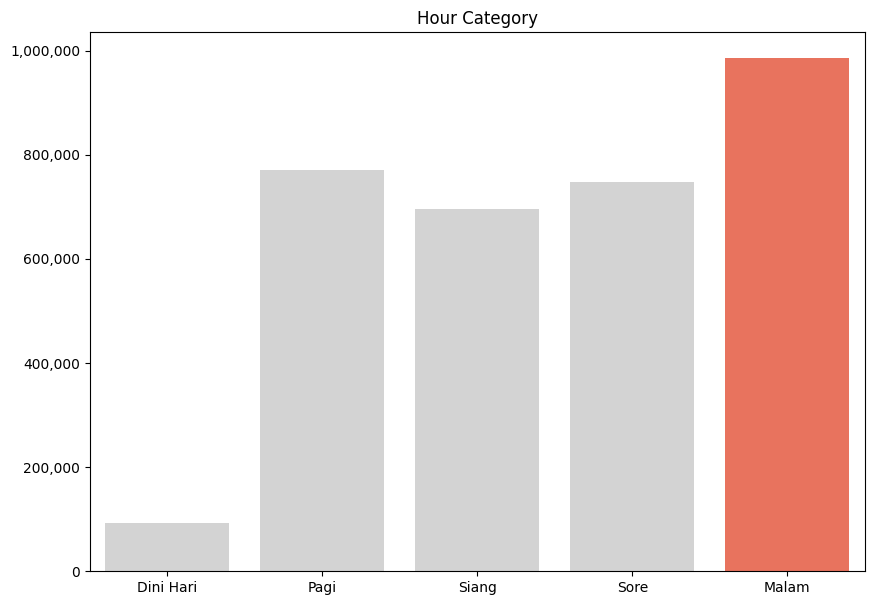

In [32]:
visualize_multiple_plots(
    nrows=1,
    plots=[
        {
            'dataframe': hour_df,
            'by': 'hour_category',
            'x_axis': 'hour_category',
            'title': 'Hour Category',
            'reindex': list(hour_mapping.keys())
        },
    ],
)

**Insight:**

Distribusi tersewanya sepeda paling banyak pada malam hari dimana ini berkisar antara pukul 18.00 hingga 24.00 sementara paling sedikit terjadi pada dini hari yakni pada pukul 00.00 hingga 05.00 pagi

## Analisis Lanjutan

Untuk menjawab pertanya pertama, akan digunakan teknik analisis clustering. Dimana teknik ini merupakan teknik statistik yang digunakan untuk mengelompokkan titik data yang serupa ke dalam kelompok atau klaster berdasarkan fitur-fiturnya.

Selanjutnya, untuk mempersiapkan teknik tersebut diperlukan langkah pertama yakni menentukan kolom-kolom fitur, yakni akan diambil kolom `temp`, `hum`, `windspeed`, `weathersit`, `season`, dam `cnt`. Kemudian karena kolom `temp`, `hum`, dan `windspeed` merupakan nilai normalisasi, akan diubah ke nilai sebenarnya dengan masing-masing berurut diubah menjadi `temp_origin`, `hum_origin` dan `windspeed_origin`

In [33]:
# Load the dataset
df = pd.read_csv('./data/day.csv')

# get origin value each normalization
df['temp_origin'] = df['temp'].apply(get_origin_temperature)
df['hum_origin'] = df['hum'].apply(get_origin_humidity)
df['windspeed_origin'] = df['windspeed'].apply(get_origin_windspeed)

# check data
df.sort_values(by='temp_origin', ascending=False).head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_origin,hum_origin,windspeed_origin
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840,32.498349,49.2083,10.958118
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285,31.910849,50.0000,8.791807
202,203,2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.133100,562,2825,3387,31.871651,58.0417,8.917700
209,210,2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846,31.401651,54.2500,11.667246
545,546,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463,31.205849,48.8750,11.082939


langkah selanjutnya adalah melakukan rescalling untuk membuat nilai pada setiap kolom fitur sebandin

In [34]:
# selected features
features = [
    'temp_origin',
    'hum_origin',
    'windspeed_origin',
    'weathersit',
    'season',
    'cnt',
]

# Normalize the features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df[features])

# Convert back to DataFrame for easier handling
normalized_df = pd.DataFrame(normalized_features, columns=features)

Kemudian, menentukan banyaknya <i>cluster</i> dimana dibutuhkan <i>silhoutte analysis</i> untuk nilai rata-rata dari <i>silhouette</i>. Untuk melakukannya dapat menggunakan iterasi.

/home/fn-hame/MyRepo/dicoding_data_analyst_python/submission/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fn-hame/MyRepo/dicoding_data_analyst_python/submission/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/fn-hame/MyRepo/dicoding_data_analyst_python/submission/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fn-hame/MyRepo/dicoding_data_analyst_python/submission/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fn-hame/MyRepo/dicoding_data_analyst_python/submission/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fn-hame/MyRep

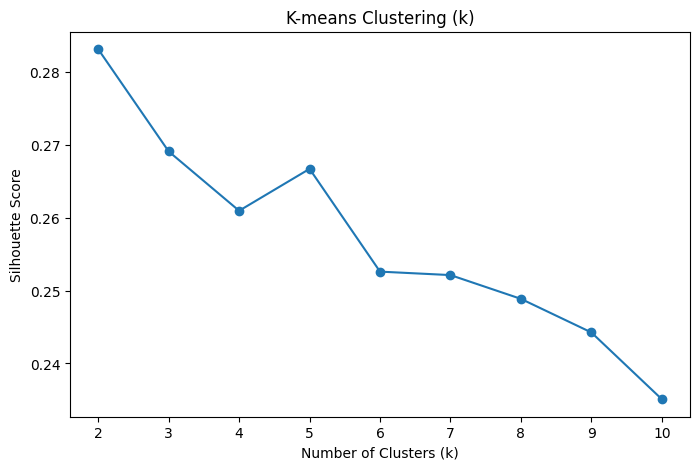

In [35]:
silhouette_scores = []
kmax = 10

k_values = range(2, kmax + 1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in k_values:
  kmeans = KMeans(n_clusters = k).fit(normalized_features)
  labels = kmeans.labels_
  score = silhouette_score(normalized_features, labels, metric='euclidean')

  silhouette_scores.append(score)

# Plot the Shadow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title(f"K-means Clustering (k)")
plt.xlabel('Number of Clusters (k)')
plt.ylabel("Silhouette Score")
plt.show()

Hasil dari plot tersebut adalah mencari titik paling atas, dari hasil tersebut dapat diambil bahwa n_<i>clusters</i>=2 yang akan menghasilkan nilai <i>silhouette</i> tertinggi. Dari ini masukkan nilai tersebut ke model KMeans sebagai argumen `n_cluster`, dan hasil <i>cluster</i> nya akan dibuatkan kolom `cluster` dalam dataframe

In [36]:
optimal_k = k_values[np.argmax(silhouette_scores)]

kmeans = KMeans(n_clusters=optimal_k, random_state=50)
df['cluster'] = kmeans.fit_predict(normalized_features)

/home/fn-hame/MyRepo/dicoding_data_analyst_python/submission/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Agar dapat melihat hasil dari <i>cluster</i> akan dibuat _scatter_ plot, yang akan dilihat merupakan tiap-tiap kolom fitur `temp_origin`, `hum_origin`, dan `windspeed_origin` dengan `cnt` untuk melihat relasi kolom-kolom fitur tersebut dengan kolom `cnt`

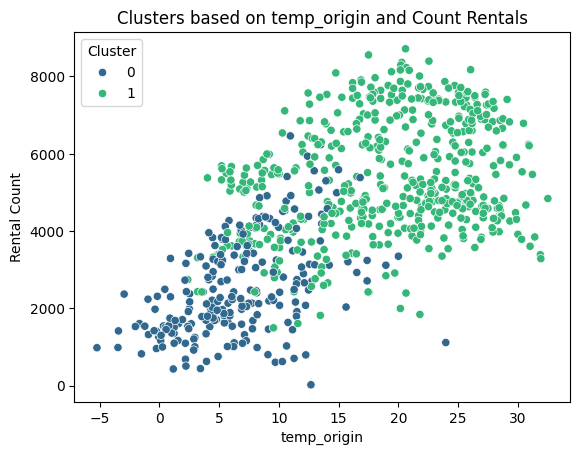

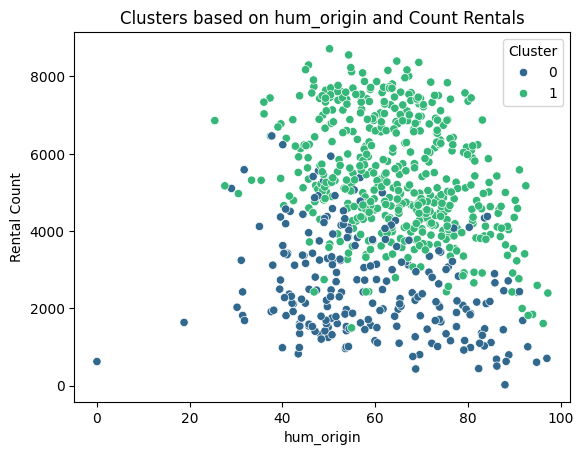

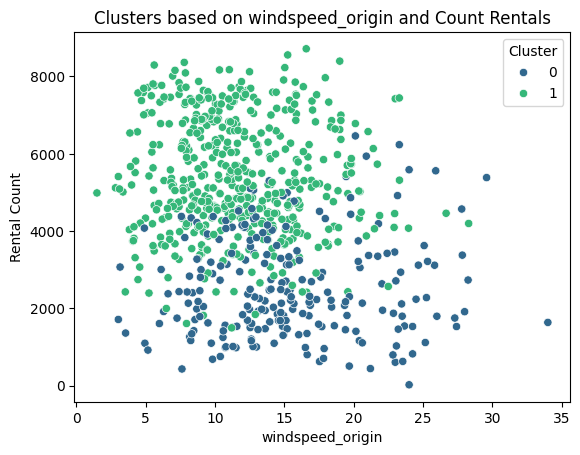

In [37]:
FEATURE_COLUMNS = [
    'temp_origin',
    'hum_origin',
    'windspeed_origin',
]

for column in FEATURE_COLUMNS:
    sns.scatterplot(data=df, x=column, y='cnt', hue='cluster', palette='viridis')
    plt.title('Clusters based on {0} and Count Rentals'.format(column))
    plt.xlabel('{0}'.format(column))
    plt.ylabel('Rental Count')
    plt.legend(title='Cluster')
    plt.show()


Dari hasil langkah-langkah sebelumnya dan plot yang ditampilkan diatas dapat disimpulkan sebagai berikut
- pada _cluster_ 1 merupakan sekelompok orang yang melakukan paling banyak peminjaman sepeda, sementara _cluster_ 0 sebaliknya
- kemudian _cluster_ 1 cenderung meminjam diantara suhu yang sejuk (20 celcius) ke panas (lebih dari 30 celcius), sementara _cluster_ 0 sebaliknya
- pada kelembapan yang sangat kering ke kering yang berkisar (kurang dari 30% - 50%), _cluster_ 0 cenderung lebih banyak, sementara kelembapan lainnya masing-masing cluster terdapat minat untuk meminjam sepeda
- terakhir, penyewa pada _cluster_ 1 cenderung melakukannya pada saat kecepatan angin tenang hingga bertepatan atau berkisar antara (< 10 knot hingga 50 knot) sisanya adalah _cluster_ 0

## Conclusion

- Faktor lingkungan berpengaruh terhadap banyaknya penyewaan sepeda, hal ini ditunjukkan dari tiap tiap kategori tidak ada yang sama,
    - Penyewa sepeda cenderung lebih banyak saat musim gugur
    - Menurut faktor cuaca, penyewa sepeda menyukai saat cuaca cerah
    - Sementara berdasarkan suhu lingkungan, penyewa sepeda cenderung banyak pada saat suhu hangat yakni berkisar antara 20 derajat celcius hingga 30 derajat celcius
    - Selain itu, dilihat dari faktor kelembapan, penyewa sepeda cenderung banyak saat kelembapan sedang pada rentang 50% - 70%
    - Terakhir, untuk faktor kecepatan angin. Banyak penyewa sepeda cenderung memiliki potensi saat kecepatan angin sedang pada saat kecepatan  angin berada diantara 10 knot dan 30 knot

- Hari libur tidaklah berpengaruh terhadap kenaikan sepeda, ini berarti saat hari libur justru rata-rata peminjaman sepeda menurun
- Puncak terjadinya penyewaan sepeda dalam tahun 2011 hingga 2012 adalah pukul 17, sementara paling sedikit terjadi pada pukul 4
- Distribusi tersewanya sepeda pada waktu-waktu sepanjang hari pada tahun 2011-2012 terjadi paling banyak saat malam antara pukul 18-23, sementara paling sedikit saat dini hari yakni antara pukul 00-05 pagi